## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
boston = datasets.load_boston()
df_boston = sklearn_to_df(boston)
df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [2]:
X = df_boston
y = df_boston['target'][:,np.newaxis]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
clf1 = DecisionTreeRegressor(criterion = 'mse', max_depth = None, min_samples_split = 2, min_samples_leaf = 1)
clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)

0.19425196850393725

In [3]:
clf2 = DecisionTreeRegressor(criterion = 'mae', max_depth = 200, min_samples_split = 2, min_samples_leaf = 1)
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)

0.4034645669291336

/usr/local/lib/python3.5/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


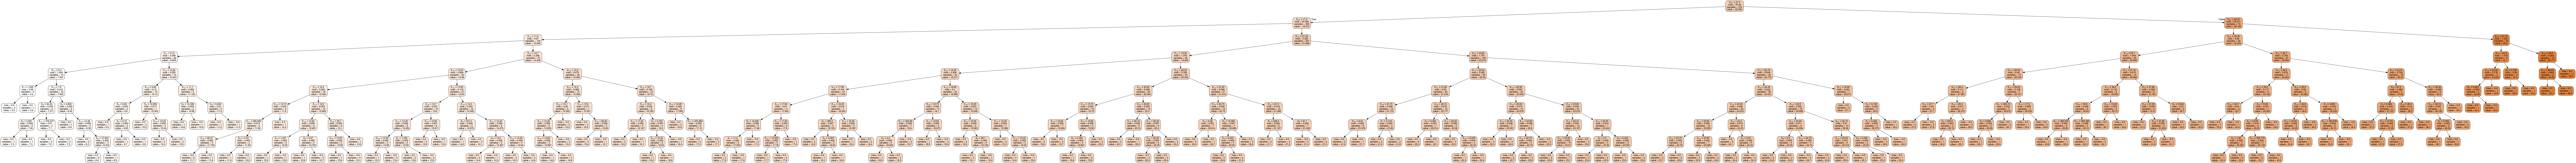

In [4]:
## sudo pip3 install pydotplus
## sudo apt-get install graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf1, out_file = dot_data, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

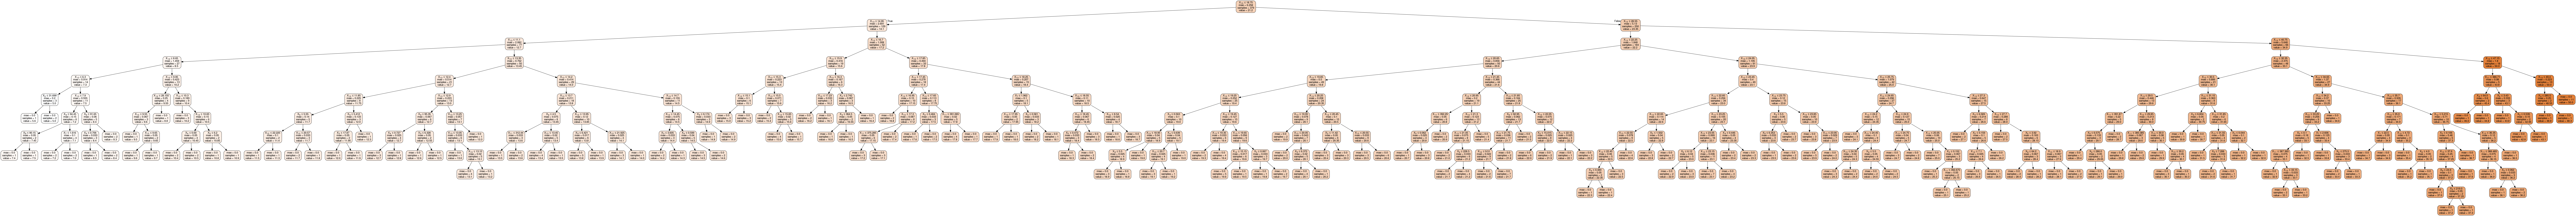

In [5]:
dot_data2 = StringIO()
export_graphviz(clf2, out_file = dot_data2, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph.create_png())